# Homework 2

## Physics 7810
## Due February 10, 2020

## H2.1 - Molecular dynamics of the Lennard-Jones system

Write an MD program to simulate the three-dimensional (3D) Lennard-Jones (LJ) system in the $NVE$ ensemble in Python, with separate Python functions for initialization, the MD loop, integration of the equations of motion, the force calculation, etc. Implement periodic boundary conditions, assuming that the $N$ particles in the simulation are initially placed in a cubic box of sidelength $L$ (so the volume $V = L^3$).

Refer to Chapter 1 in Allen and Tildesley for the definition of the LJ potential (Section 1.3.2) and for a discussion of how to implement periodic boundary conditions (Section 1.6.4). To calculate the LJ interactions, you'll need to use the *nearest image convention*, which can be implemented in a similar way to periodic boundary conditions, and is discussed in Sections 1.6.3 and 1.6.4 of Allen and Tildesley.

This will be very similar in structure to the MD program you wrote for the second tutorial, but in 3D instead of 2D and with periodic boundary conditions, and with a different interaction potential (and no central force potential). 

To initialize the system, particles can be placed on a regular lattice, or placed at random points within cubic box, taking care to avoid close contacts between pairs of particles. Assign random velocities to the particles initially (sampled from either a uniform or Gaussian distribution). *Hint*: check out the `random` Python library for generating random deviates.

Using your simulation code, try to reproduce something resembling Figure 4.3 in Frenkel and Smit, which is a plot of the kinetic, potential, and total energies of the system as a function of the number of timesteps in a simulation of $N = 108$ LJ particles. You may need to vary the integration timestep to obtain stable dynamics. Frenkel and Smit say that this simulation was run at a *dimensionless temperature* of $T^\ast = 0.728$ and a *dimensionless density* of $\rho^\ast = 0.8442$. Try to figure out how these dimensionless thermodynamic variables are defined in terms of the parameters of the LJ potential.

We haven't yet discussed how to measure temperature, but you can obtain the average temperature using the equipartition theorem, which gives

$$
k_B T = \frac{\langle 2 K \rangle}{N_f}.
$$

Here, $K$ is the kinetic energy, $N_f = 3N - 3$ is the number of quadratic degrees of freedom that contribute to the kinetic energy, and the angle brackets denote a time average (see Chapter 2 in Allen and Tildesley or Chapter 4 in Frenkel and Smit).

An *instantaneous* temperature $T(t)$ can also be defined through

$$
T^{*}(t) = \frac{k_B T(t)}{\epsilon} = \frac{ 2 K(t) }{N_f \epsilon},
$$

where $K(t)$ is the instantaneous kinetic energy. Use these expressions to measure the instantaneous and time-averaged temperatures for your simulation of the LJ system, and make a plot of $T^{*}(t)$ as a function of $t$.

### Solution

In addition to the implmentation of periodic boundary condition, minimum image convention, and Newton's law in 3-dimensional space, in this problem we use Lennard-Jones potential rather than central force potential in Tutorial_02. Therefore, to start with, we can similarly derive the force acting on each particle.
Specifically, the Hamiltonian of the system in this case is:
$$H = \sum_{i=1}^{N}\frac{p_{i}^{2}}{2m} + \sum_{j=1}^{N-1}\sum_{j=i+1}^{N}4 \epsilon \left [ \left ( \frac{\sigma}{r_{ij}} \right )^{12} - \left ( \frac{\sigma}{r_{ij}} \right )^{6} \right ] = \sum_{i=1}^{N}\frac{p_{i}^{2}}{2m} + \sum_{j=1}^{N-1}\sum_{j=i+1}^{N}4 \epsilon \left [ \sigma^{12} (r_{ij})^{-12} - \sigma^{6} (r_{ij})^{-6} \right ]$$

Note that 
$$\frac{\partial r_{ij}^{k}}{\partial x_{i}} = \frac{\partial}{\partial x_{i}}\left ( \left [ (x_{i} - x_{i})^{2} + (y_{i} - y_{i})^{2} \right ]^{k/2} \right ) = \frac{k}{2} \left ( \left [ (x_{i} - x_{i})^{2} + (y_{i} - y_{i})^{2} \right ]^{k/2-1} \right ) \cdot 2(x_{i}-x_{j}) = k(x_{i} - x_{j})r_{ij}^{k-2} , \; \frac{\partial r_{ij}^{k}}{\partial x_{i}} = k(y_{i} - y_{j})r_{ij}^{k-2}$$

Therefore, we have:
$$f_{x, i} = -\frac{\partial U(x_{i}, y_{i})}{\partial x_{i}} = -\sum_{j \neq i}^{N} 4 \epsilon \left [ \sigma^{12}(-12)(x_{i} - x_{i})r_{ij}^{-14} - \sigma^{6}(-6)(x_{i} - x_{i})r_{ij}^{-8} \right ] = \sum_{j \neq i}^{N} (x_{i} - x_{j}) \left ( \frac{48 \epsilon}{r_{ij}^{2}} \right ) \left [ \left ( \frac{\sigma}{r_{ij}} \right )^{12} - \frac{1}{2} \left ( \frac{\sigma}{r_{ij}} \right )^{6} \right ]$$
$$f_{y, i} = -\frac{\partial U(x_{i}, y_{i})}{\partial y_{i}} = -\sum_{j \neq i}^{N} 4 \epsilon \left [ \sigma^{12}(-12)(y_{i} - y_{i})r_{ij}^{-14} - \sigma^{6}(-6)(y_{i} - y_{i})r_{ij}^{-8} \right ] = \sum_{j \neq i}^{N} (y_{i} - y_{j}) \left ( \frac{48 \epsilon}{r_{ij}^{2}} \right ) \left [ \left ( \frac{\sigma}{r_{ij}} \right )^{12} - \frac{1}{2} \left ( \frac{\sigma}{r_{ij}} \right )^{6} \right ]$$

Also note that $f_{ij} = - f_{ji}$ and there is only one value of $p_{ij}$ between a pair of particles.

Refactoring the Python library `MD_NVE.py` used in Tutorial_02 by adding functions accounting for LJ potential, minimum image convention and 3-dimensional Newton's law, we are able to get the simulation results as follows.

First, let's test if our functions dealing with PBC are working well:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm
from matplotlib import rc

x-coords:  [ 0.   0.   0.   0.6  0.  -0.6  0.6  0.   0.3]
y-coords:  [ 0.3  0.3 -0.3 -0.6  0.  -0.3  0.3 -0.3 -0.3]
distance without PBC:  0.6
distance with PBC:  0.6


x-coords:  [ 0.   0.   0.   5.6  0.  -0.6  0.6  0.   0.3]
y-coords:  [ 0.3  0.3 -0.3 -0.6  0.  -0.3  0.3 -0.3 -0.3]
distance without PBC:  5.6
distance with PBC:  0.40000000000000036


x-coords:  [ 0.   0.   0.  -0.4  0.  -0.6  0.6  0.   0.3]
y-coords:  [ 0.3  0.3 -0.3 -0.6  0.  -0.3  0.3 -0.3 -0.3]
distance without PBC:  0.40000000000000036
distance with PBC:  0.40000000000000036




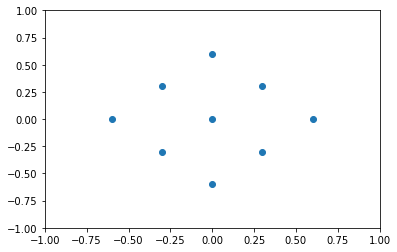

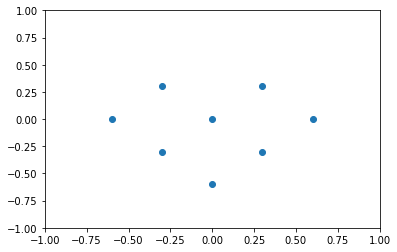

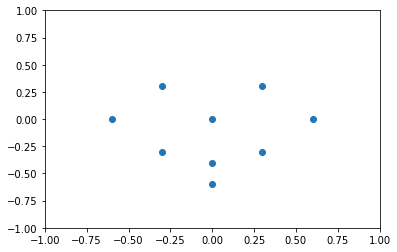

In [2]:
def plot_PBC(coords, box_length=2):
    l = len(coords)
    print('x-coords: ', coords.reshape(2,  len(coords))[0])
    print('y-coords: ', coords.reshape(2,  len(coords))[1])
    #print('\n')
    plt.figure()
    plt.scatter(coords[:, 0], coords[:, 1])
    plt.xlim([-0.5 * box_length, 0.5 * box_length])
    plt.ylim([-0.5 * box_length, 0.5 * box_length])
    
def PBC_dist(coord_i, coord_j, box_length):
    r_ij = coord_i - coord_j
    dist1 = norm(r_ij)
    print('distance without PBC: ', dist1)
    
    r_ij = r_ij - box_length * np.round(r_ij / box_length)
    dist2 = norm(r_ij)
    print('distance with PBC: ', dist2)
    print('\n')
    
box_length = 2
    
coords = np.array([[0, 0], [0, 0.6], [0, -0.6], [0.6, 0], [0.3, 0.3], [0.3, -0.3], [-0.6, 0], [-0.3, 0.3], [-0.3, -0.3]])
plot_PBC(coords)
PBC_dist(coords[0], coords[1], box_length)

coords[1][1] += 5
plot_PBC(coords)
PBC_dist(coords[0], coords[1], box_length)

coords -= box_length * np.round(coords / box_length)
plot_PBC(coords)
PBC_dist(coords[0], coords[1], 2)

From the figure above, we can clearly see that the functions dealing with the periodic boundary conditions worked well, in terms of the visualization and the calculation of the interparticle distances. Validating this, we now move on to run an MD simulation with the following parameters read from the file `Homework_02.yml`.
```yml
# Molecular dynamics simulation parameters
N_particles: 64
N_steps: 20000
dt: 0.01
m: 1   # the mass of the particles (all the same)
r_c: 0
box_length: 10
# rho: 0.8442           # reduced density
temperature: 0.728    # reduced temperatrue
epsilon: 1  # epsilon in LJ potential
sigma: 1    # signma in LJ potential

print_freq: 1
dimension: 3
potential: 'LJ'
PBC: 'yes'
coords_method: 'lattice'   # note that lattice method can only be used if N_particles is a perfect cube number
velo_method: 'temp_rescale'
shift_energy: 'no'
```

In [3]:
import sys
sys.path.insert(1, '../')  # so the system can locate the library folder
from CompPhysLib.MD_NVE import *

In [4]:
mdp = Initialization('Homework_02.yml')
MD = MolecularDynamics('Homework_02.yml')
MD.verlet_integration(MD.velocities, MD.coords)

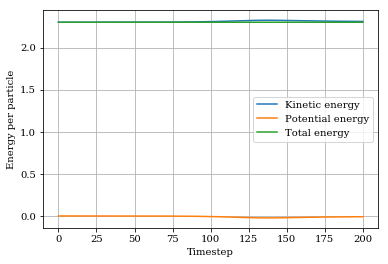

In [5]:
MDA = MDAnalysis('Homework_02.yml', 'Homework_02_traj.yml')
MDA.plot_energy()

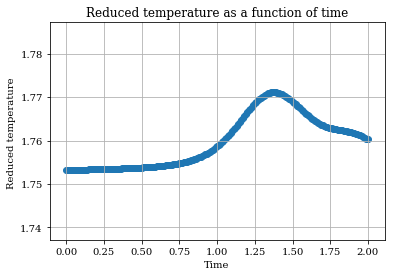

In [6]:
MDA.plot_2d(MDA.temp, 'Reduced temperature')

In [7]:
vars(MD)

{'param': {'simulation': 'MD',
  'N_particles': 8,
  'N_steps': 200,
  'dt': 0.01,
  'm': 1,
  'r_c': 0,
  'box_length': 10,
  'temperature': 0.728,
  'epsilon': 1,
  'sigma': 1,
  'print_freq': 1,
  'dimension': 3,
  'potential': 'LJ',
  'PBC': 'yes',
  'coords_method': 'lattice',
  'velo_method': 'temp_rescale',
  'shift_energy': 'no'},
 'simulation': 'MD',
 'N_particles': 8,
 'N_steps': 200,
 'dt': 0.01,
 'm': 1,
 'r_c': 0,
 'box_length': 10,
 'temperature': 0.728,
 'epsilon': 1,
 'sigma': 1,
 'print_freq': 1,
 'dimension': 3,
 'potential': 'LJ',
 'PBC': 'yes',
 'coords_method': 'lattice',
 'velo_method': 'temp_rescale',
 'shift_energy': 'no',
 'kb': 1,
 'energy_truncation': 'no',
 'prefix': 'Homework_02',
 'traj_name': 'Homework_02_traj.yml',
 'd': 5.0,
 'coords': array([[-2.5, -2.5, -2.5],
        [-2.5, -2.5,  2.5],
        [-2.5,  2.5, -2.5],
        [-2.5,  2.5,  2.5],
        [ 2.5, -2.5, -2.5],
        [ 2.5, -2.5,  2.5],
        [ 2.5,  2.5, -2.5],
        [ 2.5,  2.5,  2.5]

In [15]:
test = copy.deepcopy(vars(mdp))
del test['param']

In [5]:
def test(a: int):
    a += 1
    print(a)

In [7]:
test(3.4)

4.4


In [25]:
class Testing1:
    def __init__(self):
        self.a = 1
        
class Testing2(Testing1):
    def __init__(self):
        Testing1.__init__(self)
    
    def test2(self):
        self.b += 1

In [26]:
T1 = Testing1()
T2 = Testing2()
vars(T2)

{'a': 1}

In [4]:
mdp = MDParameters('Homework_02.yml')
MD = MolecularDynamics('Homework_02.yml')
MD.verlet_integration(MD.velocities, MD.coords)

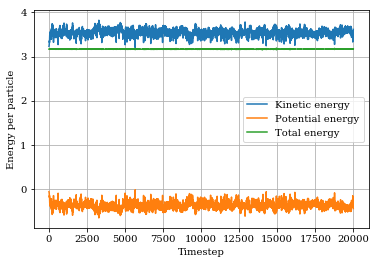

In [5]:
MDA = MDAnalysis('Homework_02.yml', 'Homework_02_traj.yml')
MDA.plot_energy()

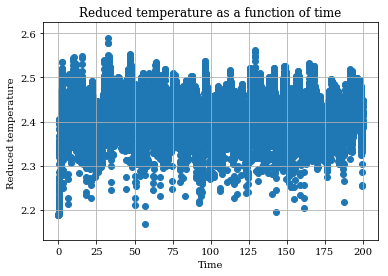

In [6]:
MDA.plot_2d(MDA.temp, 'Reduced temperature')